This is formatting and aligning data from Copernicus EMS data: https://rapidmapping.emergency.copernicus.eu/

In [1]:
import geopandas as gpd
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import yaml
from rasterio.crs import CRS
import pandas as pd
import fiona

In [2]:
yaml_file = '../events/tuscany_flood_2023.yml' #'porto_algre.yml'
with open(yaml_file) as f:
    event_dict = yaml.safe_load(f)["event"]
event_dict

{'event_name': 'tuscany_flood_2023',
 'bounds': [10.97631339, 43.81441325, 11.15319728, 43.98650075],
 'event_date': '2023-11-02',
 'pre_event_window_days': 100,
 'post_event_window_days': 60,
 'rtc_track_numbers': [15, 168],
 'mgrs_tiles': ['32TPP'],
 'dist_hls_confirmed_change_min_days': 30,
 'source_id': 'Copernicus EMSN185',
 'links': ['https://emergency.copernicus.eu/mapping/list-of-components/EMSN185',
  'https://earthobservatory.nasa.gov/images/152051/flooding-in-tuscany']}

In [23]:
fiona.listlayers('../external_validation_data/copernicus_ems/tuscany_flood_2023/EMSN185_STD_UTM32N.gdb')

['P00_sensor_footprint',
 'P00_data_source',
 'P08DDA_DamageAssessmentP',
 'P08DDA_DamageAssessmentL',
 'P00_map_frame',
 'P00_aoi',
 'P08DDA_ObservedEventL',
 'P08DDA_ObservedEventP',
 'P20RHIA_BoundaryA',
 'P20RHIA_BoundaryL',
 'P20RHIA_BuiltupA',
 'P20RHIA_Contour',
 'P20RHIA_Facilities',
 'P20RHIA_HydrographyA',
 'P20RHIA_HydrographyL',
 'P20RHIA_NameLoc',
 'P20RHIA_TransportationA',
 'P20RHIA_TransportationL',
 'P08DDA_ObservedEventA',
 'P08DDA_DamageAssessmentA',
 'fras_aux_pppp',
 'fras_aux_ppppp',
 'fras_aux_testRaster',
 'fras_aux_zzz',
 'fras_blk_pppp',
 'fras_blk_ppppp',
 'fras_blk_testRaster',
 'fras_blk_zzz',
 'fras_bnd_pppp',
 'fras_bnd_ppppp',
 'fras_bnd_testRaster',
 'fras_bnd_zzz',
 'fras_ras_pppp',
 'fras_ras_ppppp',
 'fras_ras_testRaster',
 'fras_ras_zzz']

In [24]:
df_event = gpd.read_file('../external_validation_data/copernicus_ems/tuscany_flood_2023/EMSN185_STD_UTM32N.gdb/', layer='P08DDA_ObservedEventA').to_crs(4326)
df_event.head()

,event_type,det_method,notation,aoi_id,dmg_src_id,SHAPE_Length,SHAPE_Area,geometry
0,1,1,1,01,2,156.006294,477.368860,"MULTIPOLYGON (((11.13390 43.81501, 11.13390 43..."
1,1,1,1,01,2,238.123451,2628.651723,"MULTIPOLYGON (((11.15292 43.82572, 11.15283 43..."
2,1,1,1,01,2,9103.940582,243031.945976,"MULTIPOLYGON (((11.15253 43.83147, 11.15265 43..."
3,1,1,1,01,2,5591.720848,68218.926011,"MULTIPOLYGON (((11.13473 43.84249, 11.13429 43..."
4,1,1,1,01,2,6611.030564,30980.920840,"MULTIPOLYGON (((11.12840 43.84180, 11.12867 43..."


<Axes: >

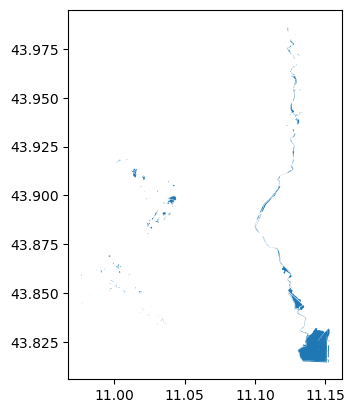

In [25]:
df_event.plot()

In [26]:
df_event = df_event.to_crs(4326)

In [27]:
df_event.total_bounds

array([10.97631339, 43.81441325, 11.15319728, 43.98650075])

In [28]:
geo = df_event.geometry.unary_union

df_event_f = gpd.GeoDataFrame({'name': [event_dict['event_name']],
                               'date': [pd.to_datetime(event_dict['event_date'])],
                               'source_id': [f'Copernicus {event_dict["source_id"]}']},
                              geometry=[geo],
                              crs=CRS.from_epsg(4326))
df_event_f.head()

,name,date,source_id,geometry
0,tuscany_flood_2023,2023-11-02,Copernicus Copernicus EMSN185,"MULTIPOLYGON (((10.97632 43.84244, 10.97635 43..."


In [29]:
EXTERNAL_VAL_DATA_DIR = Path('../external_validation_data_db/')
EXTERNAL_VAL_DATA_DIR.mkdir(exist_ok=True, parents=True)

In [30]:
df_event_f.to_file(EXTERNAL_VAL_DATA_DIR / f'{event_dict["event_name"]}.geojson', driver='GeoJSON')
#df_event_f.to_file(EXTERNAL_VAL_DATA_DIR / f'{event_dict["event_name"]}.geojson', driver='GeoJSON')

# Extent

In [31]:
df_aoi = gpd.read_file('../external_validation_data/copernicus_ems/tuscany_flood_2023/EMSN185_STD_UTM32N.gdb/', layer='P00_aoi').to_crs(4326)
df_aoi.head()

,emsn_id,fwc_type,aoi_id,locality,country,glide_no,prod_type,SHAPE_Length,SHAPE_Area,geometry
0,EMSN185,1,01,Bisenzio river,Italy,Not Applicable,"P08.1, P13, P14",45355.459908,2.618974e+07,"MULTIPOLYGON (((11.15264 43.82390, 11.15237 43..."
1,EMSN185,1,02,Bagnolo-Quarrata,Italy,Not Applicable,"P08.1, P13, P14",34033.616409,2.644024e+07,"MULTIPOLYGON (((11.01342 43.88407, 11.01785 43..."
2,EMSN185,1,03,Vaiano center,Italy,Not Applicable,"P20, P13",2080.942585,2.153184e+05,"MULTIPOLYGON (((11.12512 43.96287, 11.13031 43..."
3,EMSN185,1,04,Bisenzio North,Italy,Not Applicable,"P20, P13",10553.675808,5.948199e+05,"MULTIPOLYGON (((11.11579 43.90773, 11.11613 43..."
4,EMSN185,1,05,Bagnolo-Bardena,Italy,Not Applicable,"P20, P13",6550.218474,7.667636e+05,"MULTIPOLYGON (((11.03188 43.89288, 11.03101 43..."


<Axes: >

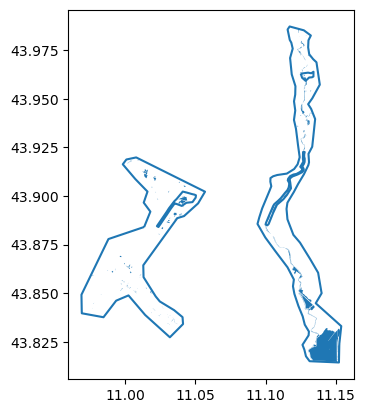

In [32]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
df_aoi.boundary.plot(ax=ax)
df_event.plot(ax=ax)

In [33]:
EXTERNAL_VAL_EXTENTS = Path('../external_validation_data_extents_db/')
EXTERNAL_VAL_EXTENTS.mkdir(exist_ok=True, parents=True)

df_aoi.to_file(EXTERNAL_VAL_EXTENTS / f'{event_dict["event_name"]}.geojson', driver='GeoJSON')